# **Import Libraries**

In [ ]:
import joblib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, levene, mannwhitneyu, kruskal

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [ ]:
df_11label = pd.read_csv("/kaggle/input/adsfsa/data.csv")
df_11label.head()

,filename,lenght,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmonic_mean,harmonic_var,percussive_mean,percussive_var,tempo,flux,contrast,flatness,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,101415-3-0-2.wav,4.0,0.445801,0.100926,0.064127,0.008668,1272.322587,248149.861226,1929.385305,437279.862184,2479.367859,3.499473e+06,0.040970,0.000143,-2.574961e-08,0.004509,-0.000013,0.005624,135.999178,1.305008,21.227080,0.003123,-402.430267,14876.565430,92.263443,4681.973145,19.303583,528.622803,-13.194186,1297.783203,-5.806573,461.490234,2.408587,103.737206,-14.885645,713.204590,-8.070933,330.622345,-9.417303,370.602875,-6.220677,185.355225,0.973379,47.285946,-5.762092,154.858109,1.656342,56.933807,0.672462,67.096268,0.964007,148.571991,5.737596,253.924896,3.124156,106.959267,3.048523,81.323135,-4.208719,80.633873,-3.609706,46.076340,dog_bark
1,102842-3-1-6.wav,4.0,0.437555,0.089910,0.005508,0.000014,2623.250506,142088.151755,2922.140245,68522.496105,6294.603363,1.023562e+06,0.094952,0.000594,-9.202954e-08,0.000024,0.000004,0.000006,129.199219,1.040583,18.840782,0.035283,-395.932434,541.549805,81.115387,187.430618,17.608677,180.742538,21.393267,124.559952,6.876369,61.261131,11.225438,50.827663,1.630578,36.666042,5.535836,42.848858,-1.564422,29.636629,4.379283,34.740940,0.814167,16.056475,5.618686,18.897438,2.114896,21.721876,9.150099,16.073460,7.237266,29.615963,11.399624,41.565609,4.276185,19.708921,3.425487,21.119240,-4.902142,21.645121,-1.353364,14.453720,dog_bark
2,102842-3-0-1.wav,4.0,0.414020,0.085047,0.010189,0.000086,1964.691393,136073.521575,2735.296270,81888.481447,5128.636425,1.856378e+06,0.059692,0.000185,-2.075301e-06,0.000102,0.000001,0.000022,129.199219,0.915061,19.019478,0.012199,-392.076233,171.415237,99.935471,160.706802,39.111130,73.800697,30.799818,50.763393,10.718008,43.427525,11.876123,42.958176,0.274951,31.743423,2.641112,22.724537,-5.765363,17.461048,-2.024269,14.972669,-7.755504,15.262851,-2.454248,15.169668,-4.992349,14.245397,3.564117,24.158562,3.277140,37.640675,10.335452,31.770369,5.993046,16.442160,7.624919,19.424845,-0.269627,24.004658,2.220974,16.811567,dog_bark
3,102842-3-1-0.wav,4.0,0.362982,0.091707,0.008424,0.000008,2007.009922,98047.001733,2656.844446,59219.164430,4974.854503,1.111185e+06,0.064216,0.000254,-7.726031e-07,0.000035,0.000002,0.000016,143.554688,1.053414,19.670984,0.013854,-373.514801,478.330109,104.392410,217.515305,24.738045,131.377151,20.360533,105.808311,4.993898,72.596275,8.980869,44.973812,-3.351018,35.072128,-3.072793,50.625046,-7.168290,42.737556,2.301548,32.056007,-0.739452,31.477739,4.235912,23.053295,-0.039153,27.127007,7.930249,26.479345,8.502192,25.204235,13.688465,34.276577,5.164061,23.093395,5.025818,21.959629,-3.550596,23.107979,-1.318111,11.611815,dog_bark
4,102842-3-1-5.wav,4.0,0.414221,0.090689,0.005821,0.000012,2514.471121,136088.769308,2894.116626,62572.328592,6131.175064,1.056774e+06,0.089324,0.000458,1.448682e-06,0.000024,0.000003,0.000007,135.999178,1.047412,18.931821,0.030127,-391.571899,502.328583,85.351158,196.966644,19.193436,151.706268,21.695240,111.186905,7.415434,53.254143,10.363002,42.792664,-0.321306,38.482327,3.408881,46.095428,-2.162839,38.081947,4.503120,40.614620,0.086177,19.633860,5.443002,21.156380,2.742051,20.576994,8.670346,19.993544,6.580069,28.996845,12.084952,31.776527,5.483204,19.552509,3.812809,17.387346,-4.512297,20.354237,-1.469074,15.576131,dog_bark


In [ ]:
df_10label = pd.read_csv("/kaggle/input/adsfsa/data_10label.csv")
df_10label.head()

,filename,lenght,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmonic_mean,harmonic_var,percussive_mean,percussive_var,tempo,flux,contrast,flatness,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,101415-3-0-2.wav,4.0,0.445801,0.100926,0.064127,0.008668,1272.322587,248149.861226,1929.385305,437279.862184,2479.367859,3.499473e+06,0.040970,0.000143,-2.574961e-08,0.004509,-0.000013,0.005624,135.999178,1.305008,21.227080,0.003123,-402.430267,14876.565430,92.263443,4681.973145,19.303583,528.622803,-13.194186,1297.783203,-5.806573,461.490234,2.408587,103.737206,-14.885645,713.204590,-8.070933,330.622345,-9.417303,370.602875,-6.220677,185.355225,0.973379,47.285946,-5.762092,154.858109,1.656342,56.933807,0.672462,67.096268,0.964007,148.571991,5.737596,253.924896,3.124156,106.959267,3.048523,81.323135,-4.208719,80.633873,-3.609706,46.076340,dog_bark
1,102842-3-1-6.wav,4.0,0.437555,0.089910,0.005508,0.000014,2623.250506,142088.151755,2922.140245,68522.496105,6294.603363,1.023562e+06,0.094952,0.000594,-9.202954e-08,0.000024,0.000004,0.000006,129.199219,1.040583,18.840782,0.035283,-395.932434,541.549805,81.115387,187.430618,17.608677,180.742538,21.393267,124.559952,6.876369,61.261131,11.225438,50.827663,1.630578,36.666042,5.535836,42.848858,-1.564422,29.636629,4.379283,34.740940,0.814167,16.056475,5.618686,18.897438,2.114896,21.721876,9.150099,16.073460,7.237266,29.615963,11.399624,41.565609,4.276185,19.708921,3.425487,21.119240,-4.902142,21.645121,-1.353364,14.453720,dog_bark
2,102842-3-0-1.wav,4.0,0.414020,0.085047,0.010189,0.000086,1964.691393,136073.521575,2735.296270,81888.481447,5128.636425,1.856378e+06,0.059692,0.000185,-2.075301e-06,0.000102,0.000001,0.000022,129.199219,0.915061,19.019478,0.012199,-392.076233,171.415237,99.935471,160.706802,39.111130,73.800697,30.799818,50.763393,10.718008,43.427525,11.876123,42.958176,0.274951,31.743423,2.641112,22.724537,-5.765363,17.461048,-2.024269,14.972669,-7.755504,15.262851,-2.454248,15.169668,-4.992349,14.245397,3.564117,24.158562,3.277140,37.640675,10.335452,31.770369,5.993046,16.442160,7.624919,19.424845,-0.269627,24.004658,2.220974,16.811567,dog_bark
3,102842-3-1-0.wav,4.0,0.362982,0.091707,0.008424,0.000008,2007.009922,98047.001733,2656.844446,59219.164430,4974.854503,1.111185e+06,0.064216,0.000254,-7.726031e-07,0.000035,0.000002,0.000016,143.554688,1.053414,19.670984,0.013854,-373.514801,478.330109,104.392410,217.515305,24.738045,131.377151,20.360533,105.808311,4.993898,72.596275,8.980869,44.973812,-3.351018,35.072128,-3.072793,50.625046,-7.168290,42.737556,2.301548,32.056007,-0.739452,31.477739,4.235912,23.053295,-0.039153,27.127007,7.930249,26.479345,8.502192,25.204235,13.688465,34.276577,5.164061,23.093395,5.025818,21.959629,-3.550596,23.107979,-1.318111,11.611815,dog_bark
4,102842-3-1-5.wav,4.0,0.414221,0.090689,0.005821,0.000012,2514.471121,136088.769308,2894.116626,62572.328592,6131.175064,1.056774e+06,0.089324,0.000458,1.448682e-06,0.000024,0.000003,0.000007,135.999178,1.047412,18.931821,0.030127,-391.571899,502.328583,85.351158,196.966644,19.193436,151.706268,21.695240,111.186905,7.415434,53.254143,10.363002,42.792664,-0.321306,38.482327,3.408881,46.095428,-2.162839,38.081947,4.503120,40.614620,0.086177,19.633860,5.443002,21.156380,2.742051,20.576994,8.670346,19.993544,6.580069,28.996845,12.084952,31.776527,5.483204,19.552509,3.812809,17.387346,-4.512297,20.354237,-1.469074,15.576131,dog_bark


# **AB TEST**

In [ ]:
class10 = ["class10", "class10", "class10", "class10", "class10", "class10", "class10", "class10",
           "class10", "class10", "class10", "class10", "class10", "class10", "class10", "class10",
           "class10", "class10", "class10", "class10", "class10", "class10", "class10", "class10"]
class10_f1score = [0.7767, 0.8937, 0.6933, 0.8952, 0.8819, 0.9215, 0.9299, 0.9296,
                   0.7204, 0.8919, 0.6936, 0.8942, 0.8795, 0.9208, 0.9290, 0.9293,
                   0.7770, 0.8323, 0.6933, 0.8954, 0.8819, 0.9219, 0.9299, 0.9310]

class11 = ["class11", "class11", "class11", "class11", "class11", "class11", "class11", "class11",
           "class11", "class11", "class11", "class11", "class11", "class11", "class11", "class11",
           "class11", "class11", "class11", "class11", "class11", "class11", "class11", "class11"]
class11_f1score = [0.7992, 0.9034, 0.7221, 0.8975, 0.8853, 0.9252, 0.9358, 0.9356,
                   0.7477, 0.9048, 0.7247, 0.8971, 0.8872, 0.9268, 0.9332, 0.9357,
                   0.8008, 0.844, 0.7211, 0.8980, 0.8846, 0.9252, 0.9326, 0.9355]

scaling_method = ["standard", "standard", "standard", "standard", "standard", "standard", "standard", "standard",
                  "minmax", "minmax", "minmax", "minmax", "minmax", "minmax", "minmax", "minmax",
                  "robust", "robust", "robust", "robust", "robust", "robust", "robust", "robust"]

df_10 = pd.DataFrame({"class_number": class10,
                      "f1score": class10_f1score,
                      "scaling_method": scaling_method})

df_11 = pd.DataFrame({"class_number": class11,
                      "f1score": class11_f1score,
                      "scaling_method": scaling_method})


df = pd.concat([df_11, df_10], axis=0, ignore_index=True)
df

,class_number,f1score,scaling_method
0,class11,0.7992,standard
1,class11,0.9034,standard
2,class11,0.7221,standard
3,class11,0.8975,standard
4,class11,0.8853,standard
5,class11,0.9252,standard
6,class11,0.9358,standard
7,class11,0.9356,standard
8,class11,0.7477,minmax
9,class11,0.9048,minmax


## *Traning Results*

**1. Standard Scaler**

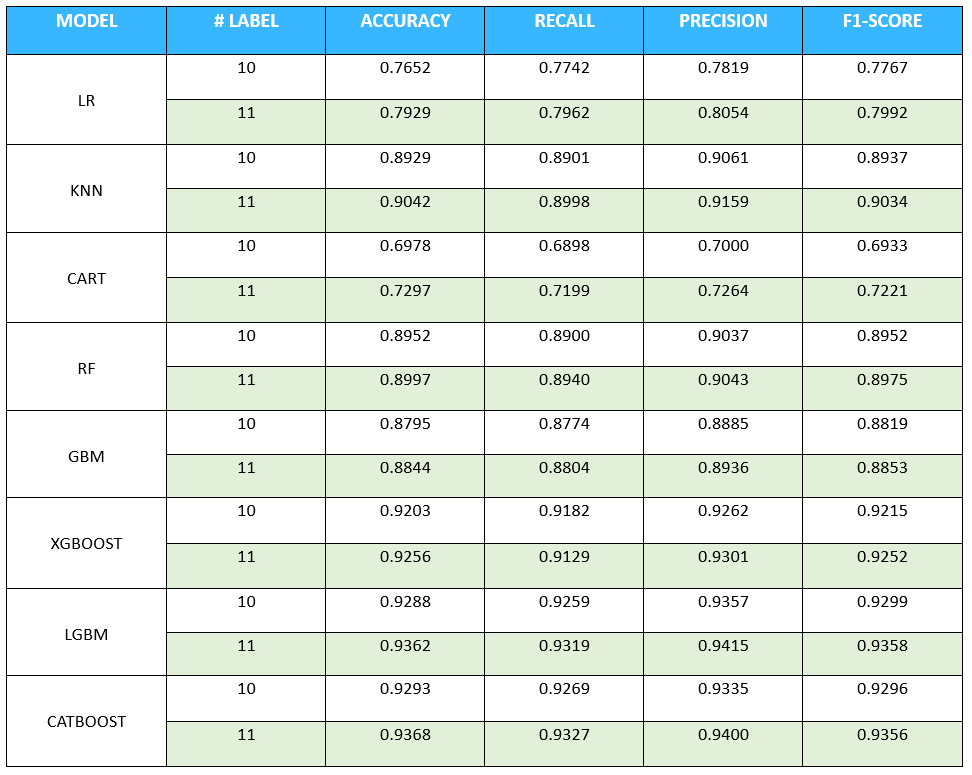

**2. MinMax Scaler**

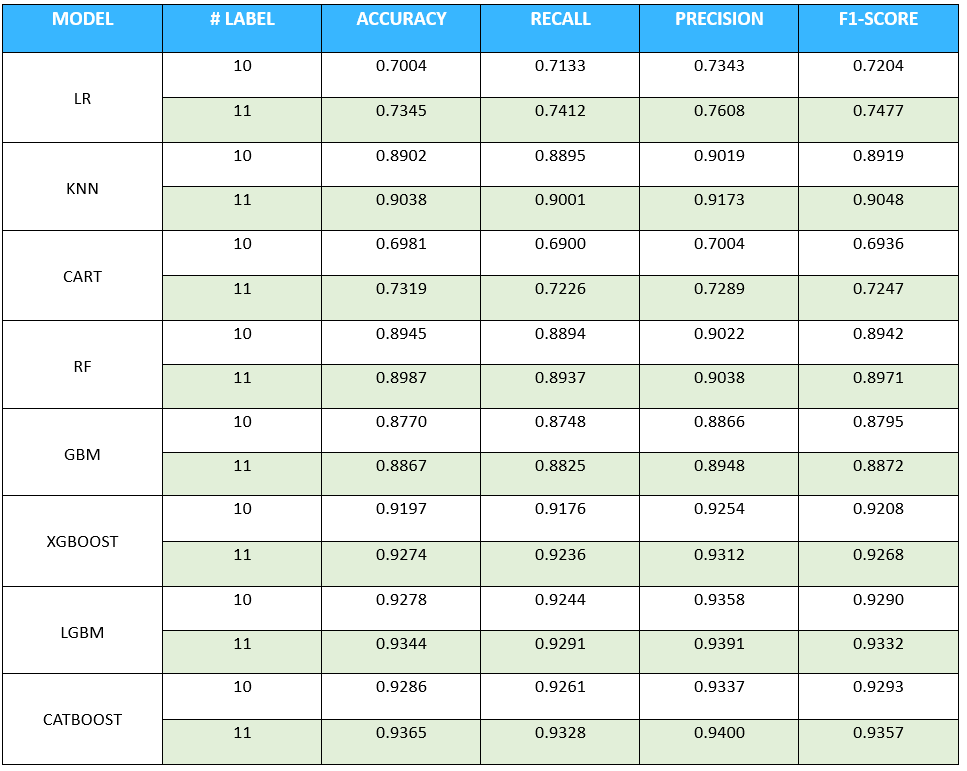

**3. Robust Scaler**

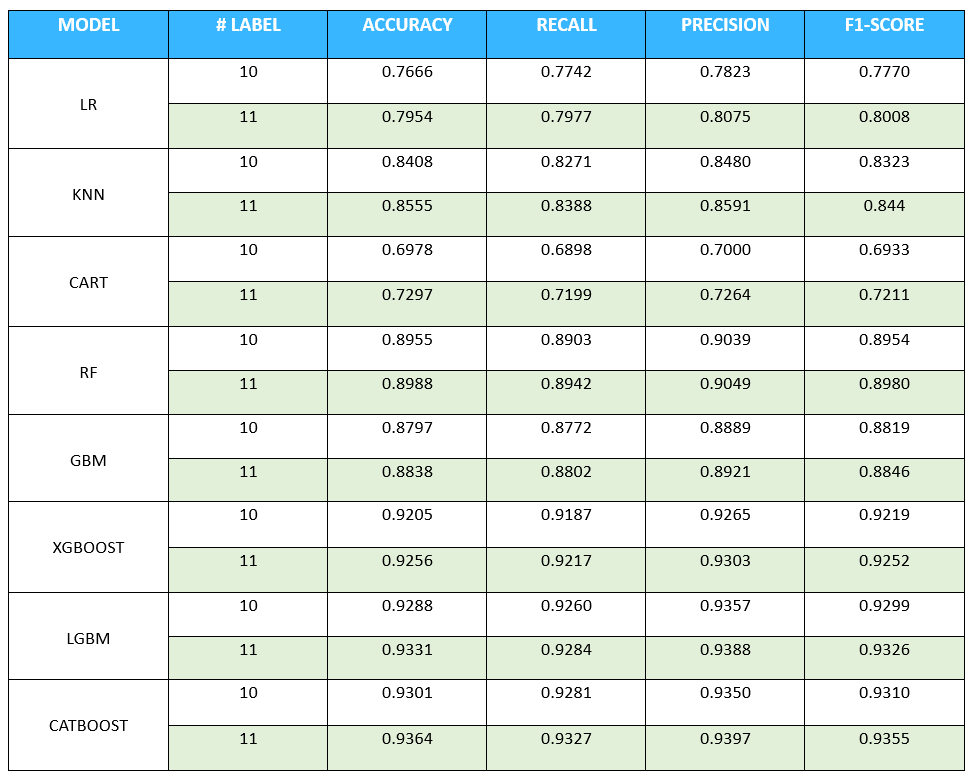

## *1. AB Test for Class Differences*

In [ ]:
df.groupby(['class_number']).agg('mean')

,f1score
class_number,
class10,0.860133
class11,0.870962


### **Normality Test with Shapiro-Wilk**

In [ ]:
test_stat, pvalue = shapiro(df.loc[df["class_number"] == "class10", "f1score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.7645, p-value = 0.0001


In [ ]:
test_stat, pvalue = shapiro(df.loc[df["class_number"] == "class11", "f1score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.7837, p-value = 0.0002


### **Levene Test for Equality of Variances**

In [ ]:
test_stat, pvalue = levene(df.loc[df["class_number"] == "class10", "f1score"],
                           df.loc[df["class_number"] == "class11", "f1score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0881, p-value = 0.7679


### **Non-parametric Test with Mann-Whitney U**

In [ ]:
test_stat, pvalue = mannwhitneyu(df.loc[df["class_number"] == "class10", "f1score"],
                                 df.loc[df["class_number"] == "class11", "f1score"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 238.0000, p-value = 0.3074


## *2. AB Test for Scaling Methods*

In [ ]:
df_11.groupby(['scaling_method']).agg('mean')

,f1score
scaling_method,
minmax,0.869650
robust,0.867725
standard,0.875513


In [ ]:
for method in list(df_11["scaling_method"].unique()):
    pvalue = shapiro(df_11.loc[df_11["scaling_method"] == method, "f1score"])[1]
    print(method, 'p-value: %.4f' % pvalue)

standard p-value: 0.0281
minmax p-value: 0.0088
robust p-value: 0.1571


In [ ]:
test_stat, pvalue = levene(df_11.loc[df_11["scaling_method"] == "standard", "f1score"],
                           df_11.loc[df_11["scaling_method"] == "minmax", "f1score"],
                           df_11.loc[df_11["scaling_method"] == "robust", "f1score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0240, p-value = 0.9764


In [ ]:
kruskal(df_11.loc[df_11["scaling_method"] == "standard", "f1score"],
        df_11.loc[df_11["scaling_method"] == "minmax", "f1score"],
        df_11.loc[df_11["scaling_method"] == "robust", "f1score"])

KruskalResult(statistic=0.2713679860808996, pvalue=0.8731185004209755)

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
comparison = MultiComparison(df_11['f1score'], df_11['scaling_method'])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
minmax   robust  -0.0019 0.9987 -0.1011 0.0973  False
minmax standard   0.0059 0.9879 -0.0933 0.1051  False
robust standard   0.0078 0.9787 -0.0914  0.107  False
-----------------------------------------------------


# **MODEL**

In [ ]:
X = df_11label.drop(["label", 'filename', 'lenght'], axis=1)
y = df_11label["label"]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
labelencoder = LabelEncoder()
y_test = labelencoder.fit_transform(y_test)
y_train = labelencoder.fit_transform(y_train)

In [ ]:
rs = StandardScaler()
X_train = rs.fit_transform(X_train)
X_test  = rs.fit_transform(X_test)

In [ ]:
def base_models(X, y):
    models = [("LR", LogisticRegression(random_state=42, solver='lbfgs', max_iter=12000)),
              ("KNN", KNeighborsClassifier()),
              ("CART", DecisionTreeClassifier(random_state=42)),
              ("RF", RandomForestClassifier(random_state=42)),
              ("GBM", GradientBoostingClassifier(random_state=42)),
              ("XGBoost", XGBClassifier(random_state=42, eval_metric='logloss')),
              ("LightGBM", LGBMClassifier(random_state=42, verbose=-1)),
              ('CatBoost', CatBoostClassifier(random_state=42, verbose=False))]
    scorers = {
            'f1_score': make_scorer(f1_score, average='macro'),
            'precision_score': make_scorer(precision_score, average='macro'),
            'recall_score': make_scorer(recall_score, average='macro'),
            'accuracy_score': make_scorer(accuracy_score)
          }
    for name, classifier in models:
        cv_results = cross_validate(classifier, X, y, cv=5, scoring=scorers)
        print(f"Accuracy: {round(cv_results['test_accuracy_score'].mean(), 4)} ({name}) ")
        print(f"f1: {round(cv_results['test_f1_score'].mean(), 4)} ({name}) ")
        print(f"precision: {round(cv_results['test_precision_score'].mean(), 4)} ({name}) ")
        print(f"recall: {round(cv_results['test_recall_score'].mean(), 4)} ({name})\n ")


In [ ]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, 'sqrt'],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

In [ ]:
classifiers  =[('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(random_state=42), cart_params),
               ("RF", RandomForestClassifier(random_state=42), rf_params),
               ('XGBoost', XGBClassifier(random_state=42, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(random_state=42, verbose=-1), lightgbm_params)]

In [ ]:
def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("\nHyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [ ]:
def voting_classifier(best_models, X, y):
    scorers = {
            'f1_score': make_scorer(f1_score, average='macro'),
            'precision_score': make_scorer(precision_score, average='macro'),
            'recall_score': make_scorer(recall_score, average='macro'),
            'accuracy_score': make_scorer(accuracy_score)
          }

    print("\nVoting Classifier...")
    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=scorers)
    print(f"Accuracy: {round(cv_results['test_accuracy_score'].mean(), 4)}")
    print(f"f1: {round(cv_results['test_f1_score'].mean(), 4)}")
    print(f"precision: {round(cv_results['test_precision_score'].mean(), 4)}")
    print(f"recall: {round(cv_results['test_recall_score'].mean(), 4)}")
    return voting_clf

In [ ]:
def fit_models(X,y):
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    voting_clf = voting_classifier(best_models, X, y)
    return voting_clf, best_models

voting_clf, best_models = fit_models(X_train, y_train)

Accuracy: 0.7929 (LR) 
f1: 0.7992 (LR) 
precision: 0.8054 (LR) 
recall: 0.7962 (LR)
 
Accuracy: 0.9042 (KNN) 
f1: 0.9034 (KNN) 
precision: 0.9159 (KNN) 
recall: 0.8998 (KNN)
 
Accuracy: 0.7297 (CART) 
f1: 0.7221 (CART) 
precision: 0.7264 (CART) 
recall: 0.7199 (CART)
 
Accuracy: 0.8997 (RF) 
f1: 0.8975 (RF) 
precision: 0.9043 (RF) 
recall: 0.894 (RF)
 
Accuracy: 0.8844 (GBM) 
f1: 0.8853 (GBM) 
precision: 0.8936 (GBM) 
recall: 0.8804 (GBM)
 
Accuracy: 0.9256 (XGBoost) 
f1: 0.9252 (XGBoost) 
precision: 0.9301 (XGBoost) 
recall: 0.9219 (XGBoost)
 
Accuracy: 0.9362 (LightGBM) 
f1: 0.9358 (LightGBM) 
precision: 0.9415 (LightGBM) 
recall: 0.9319 (LightGBM)
 
Accuracy: 0.9368 (CatBoost) 
f1: 0.9356 (CatBoost) 
precision: 0.94 (CatBoost) 
recall: 0.9327 (CatBoost)
 

Hyperparameter Optimization....
########## KNN ##########
accuracy (Before): 0.9042
accuracy (After): 0.9259
KNN best params: {'n_neighbors': 3}

########## CART ##########
accuracy (Before): 0.7297
accuracy (After): 0.7314
CART b

# **FEATURE IMPORTANCE**

In [ ]:
lgbm_model = best_models['LightGBM'].fit(X_train, y_train)

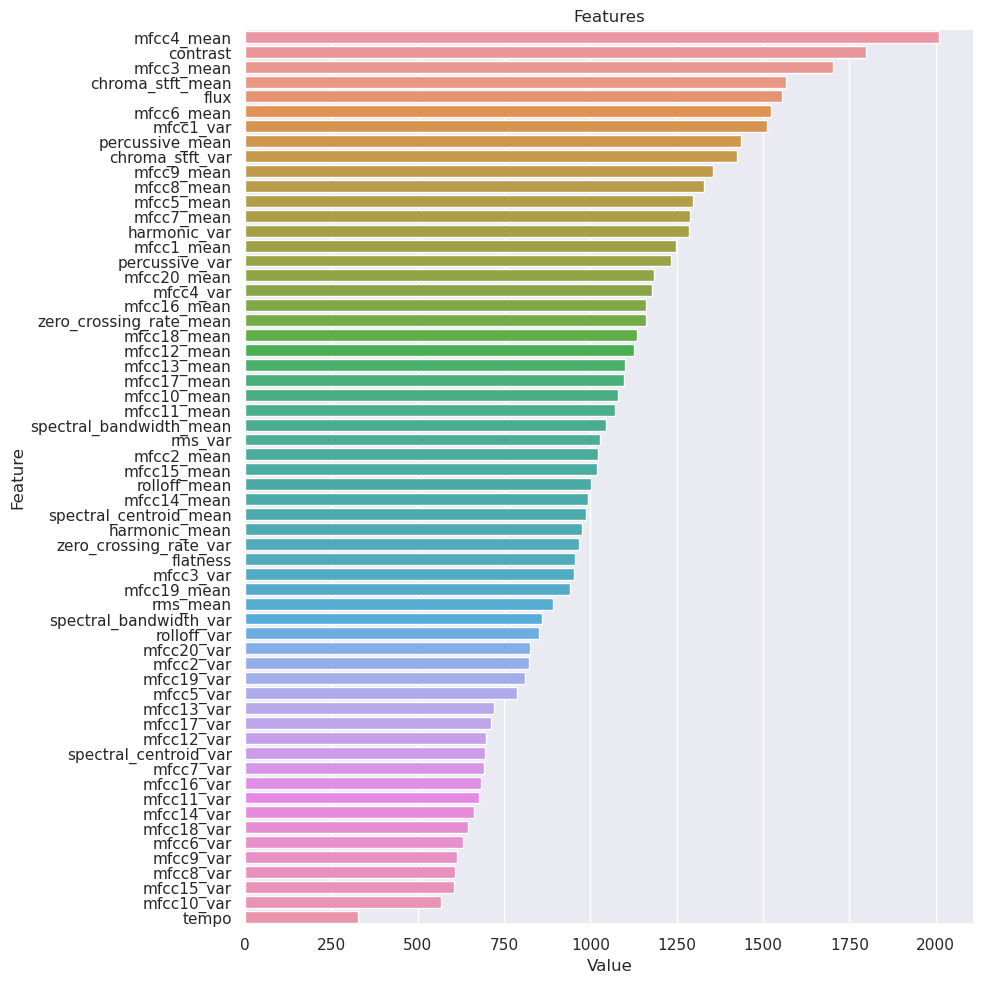

In [ ]:
def plot_importance(model, features, num=len(X)):


    feature_imp = pd.DataFrame({'Value': model.feature_importances_,
                                'Feature': df_11label.drop(["label", "filename", "lenght"], axis=1).columns})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

plot_importance(lgbm_model, X_train)

# **MODEL PERFORMANCE**

In [ ]:
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       183
           1       1.00      0.89      0.94        91
           2       0.93      0.96      0.94       186
           3       0.93      0.89      0.91       202
           4       0.91      0.96      0.93       202
           5       0.96      0.96      0.96       214
           6       0.97      0.96      0.96        70
           7       0.96      0.94      0.95       211
           8       0.99      1.00      1.00       195
           9       0.94      0.97      0.96       176
          10       0.90      0.91      0.91       217

    accuracy                           0.95      1947
   macro avg       0.95      0.94      0.95      1947
weighted avg       0.95      0.95      0.95      1947



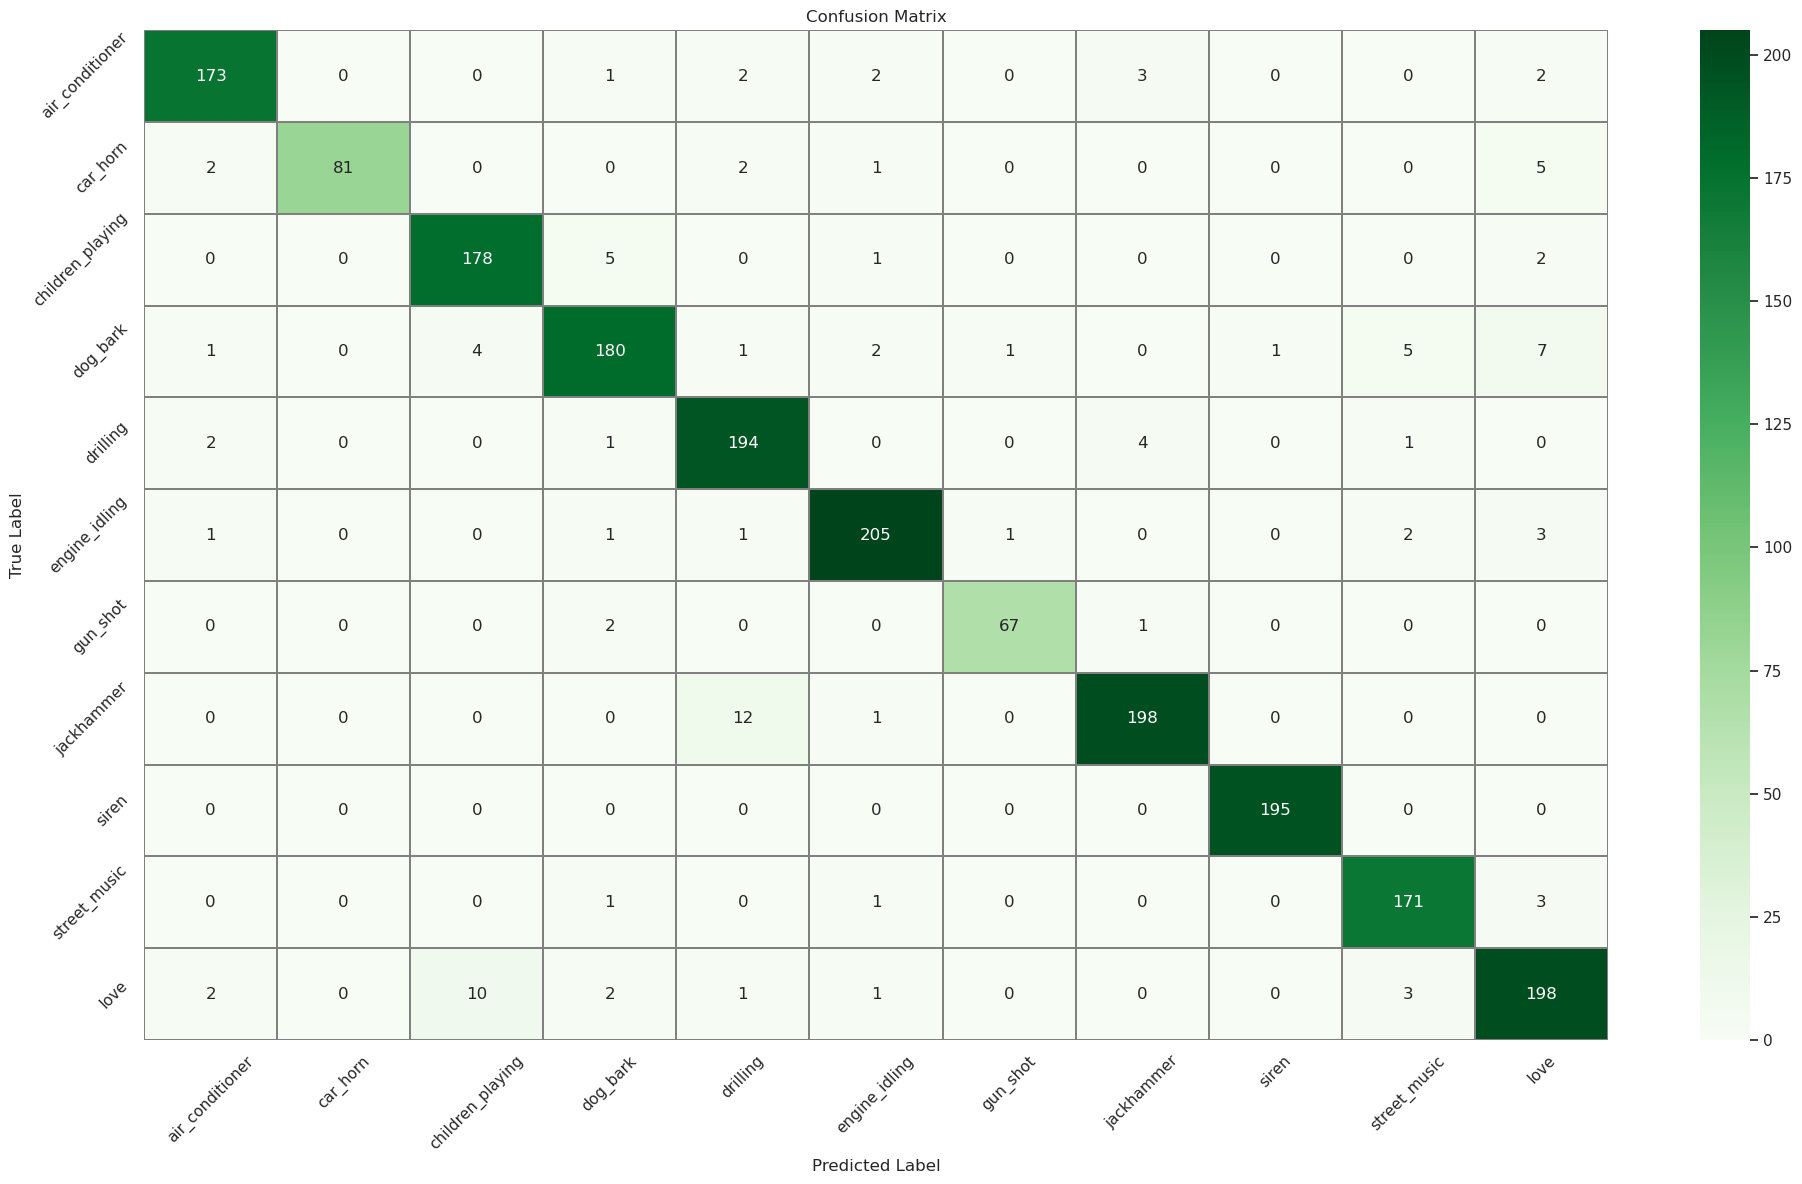

In [ ]:
y_pred = lgbm_model.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(20, 12))

sns.heatmap(confusion_mtx,
            annot=True,
            linewidths=0.01,
            cmap="Greens",
            linecolor="gray",
            fmt= '.0f',
            ax=ax)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")



ax.xaxis.set_ticklabels(["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling",
                        "engine_idling", "gun_shot", "jackhammer",  "siren", "street_music",  "love"]);
ax.yaxis.set_ticklabels(["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling",
                        "engine_idling", "gun_shot", "jackhammer",  "siren", "street_music",  "love"]);
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

# **SAVE MODEL**

In [ ]:
joblib.dump(lgbm_model, "lgbm_model_94.46.pkl")

['lgbm_model_94.46.pkl']

In [ ]:
new_model = joblib.load("/kaggle/working/lgbm_model_94.46.pkl")